In [163]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

In [164]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])
X.shape,y.shape

((4, 2), (4, 1))

### Initiation

In [165]:
input_size = 2
hidden_size = 2
output_size = 1
std = 1
alpha = 0.1 

# rand函数根据给定维度生成[0,1)之间的数据，shape(input_size, hidden_size)
W1 = std * np.random.randn(input_size, hidden_size)   #(2,10)
b1 = np.zeros((1, hidden_size))                       #(1,10)
W2 = std * np.random.randn(hidden_size,output_size)   #(10,1)
b2 = np.zeros((1, output_size))                       #(1,1)

params = {}
params["W1"] = W1
params["b1"] = b1
params["W2"] = W2
params["b2"] = b2

def accuracy(y,t):
    return (np.mean(y == t))

# output
def predict(params,X):
    z1 = np.dot(X,params["W1"]) + params["b1"]                       
    a1 = sigmoid(z1)                
    z2 = np.dot(a1,params["W2"]) + params["b2"]     
    a2 = sigmoid(z2)    
    a2[a2 <= 0.5] = 0
    a2[a2 > 0.5] = 1
    return a2

### Activation function

In [166]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def sigmoid_gradient(z):
    return np.multiply(sigmoid(z), 1 - sigmoid(z))

### Forward propagation

In [167]:
def forward_propagation(params,X):
    z1 = np.dot(X,params["W1"]) + params["b1"]    # (4*2)                      
    a1 = sigmoid(z1)                 # (4*10)    
    z2 = np.dot(a1,params["W2"]) + params["b2"]     # (4*1)
    a2 = sigmoid(z2)     # (4*1)
    return z1,a1,z2,a2

z1,a1,z2,a2 = forward_propagation(params,X)

### Loss function

In [168]:
def computeLoss(y,t): # y->predict value t->true value
#     return -np.sum(t*np.log(y+1e-5) + (1-t)*np.log(1-y+1e-5))/len(y)
    return -np.mean(wt*np.log(y+1e-5) + (1-t)*np.log(1-y+1e-5))
computeLoss(a2,y)

0.857773642479476

In [169]:
z1.shape,a1.shape,z2.shape,a2.shape

((4, 2), (4, 2), (4, 1), (4, 1))

In [170]:
def savePic(params,X,y,figname):
    plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'
    plt.subplots_adjust(wspace =0, hspace =0.3)

    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = predict(params,np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Spectral)
    plt.savefig(figname+".jpeg")

### Back propagation

In [171]:
def train(X,y,params,iterations):
    loss_history = []
    acc_history = []
    acc_t_history = []
    loss_t_history = []
    m = X.shape[0]
    for i in range(iterations):
        z1,a1,z2,a2 = forward_propagation(params,X)
        dz2 = a2 - y  # (4,1)
        dw2 = (1/m)*np.dot(a1.T,dz2) # (10,1)
        db2 = (1/m)*np.sum(dz2,axis=0,keepdims=True) # (1,1)
        dz1 = np.dot(dz2,params["W2"].T)*sigmoid_gradient(z1) # (4,10)
        dw1 = (1/m)*np.dot(X.T,dz1) # (2,10)
        db1 = (1/m)*np.sum(dz1,axis=0,keepdims=True) # (1,10)
        loss = computeLoss(a2,y)
        a2[a2 <= 0.5] = 0
        a2[a2 > 0.5] = 1
        acc = accuracy(a2,y)
        if i % 1000 == 0:
            loss_history.append(loss)
            acc_history.append(acc)
            savePic(params,X,y.reshape([-1]),str(i))
            print("iteration %d: loss %f acc %f" % (i, loss,acc))

        params["W1"] += -alpha * dw1  
        params["b1"] += -alpha * db1  
        params["W2"] += -alpha * dw2  
        params["b2"] += -alpha * db2  
    
    return {   
        'loss_history': loss_history,   
        'acc_history': acc_history,   
        "params": params,
    } 

iteration 0: loss 0.857774 acc 0.500000
iteration 1000: loss 0.690798 acc 0.500000
iteration 2000: loss 0.661595 acc 0.750000
iteration 3000: loss 0.524558 acc 0.750000
iteration 4000: loss 0.262821 acc 1.000000
iteration 5000: loss 0.098788 acc 1.000000
iteration 6000: loss 0.053985 acc 1.000000
iteration 7000: loss 0.036142 acc 1.000000
iteration 8000: loss 0.026889 acc 1.000000
iteration 9000: loss 0.021304 acc 1.000000
iteration 10000: loss 0.017590 acc 1.000000
iteration 11000: loss 0.014953 acc 1.000000
iteration 12000: loss 0.012989 acc 1.000000
iteration 13000: loss 0.011471 acc 1.000000
iteration 14000: loss 0.010264 acc 1.000000
iteration 15000: loss 0.009283 acc 1.000000
iteration 16000: loss 0.008470 acc 1.000000
iteration 17000: loss 0.007785 acc 1.000000
iteration 18000: loss 0.007202 acc 1.000000


/Users/kanseii/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


iteration 19000: loss 0.006698 acc 1.000000


<Figure size 720x576 with 0 Axes>

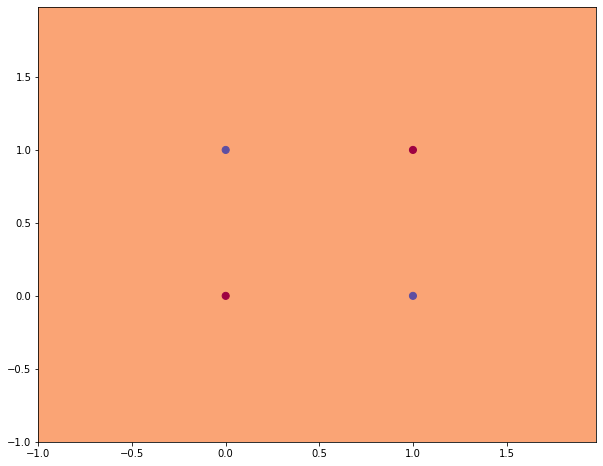

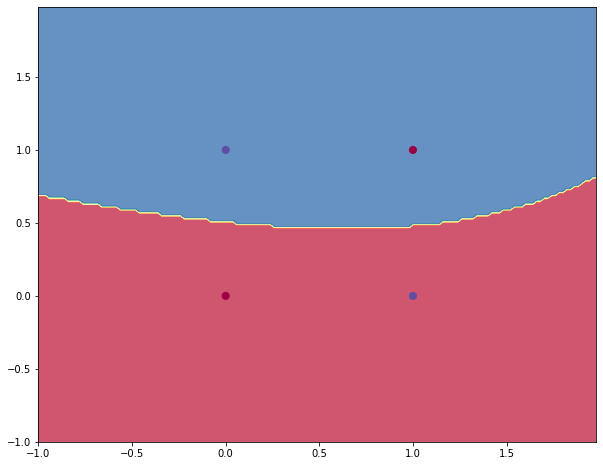

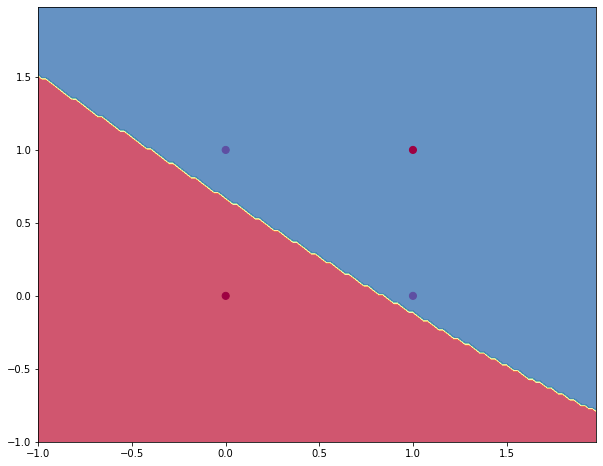

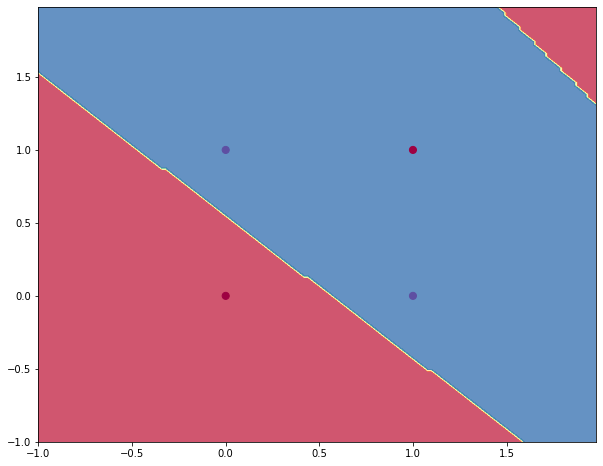

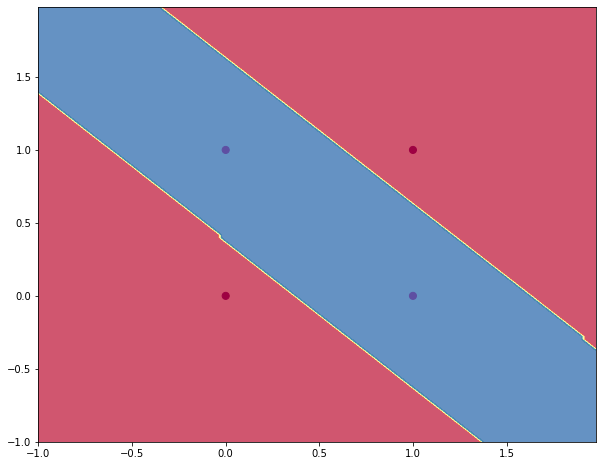

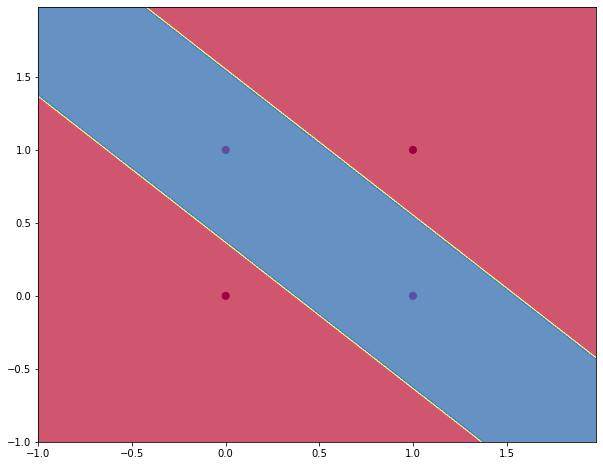

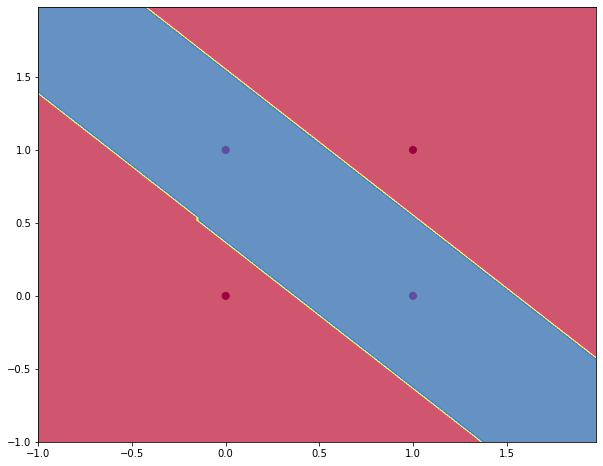

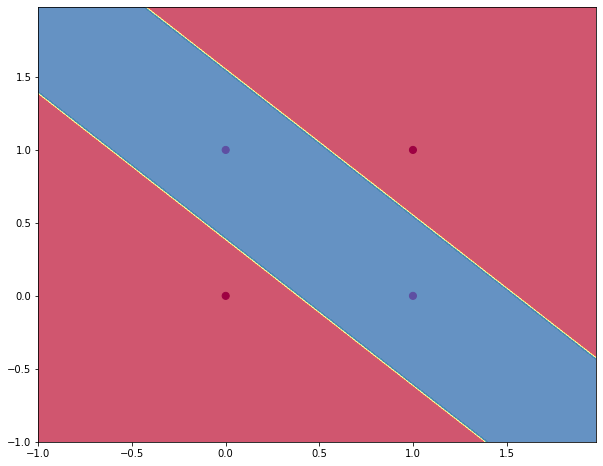

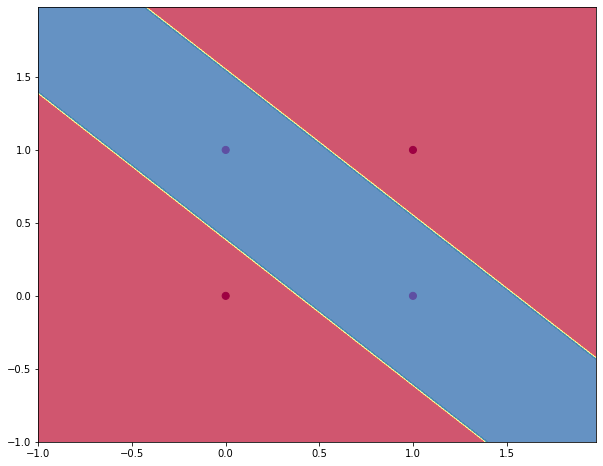

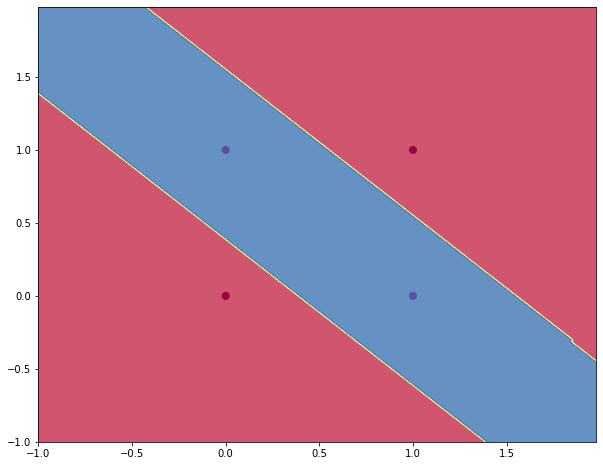

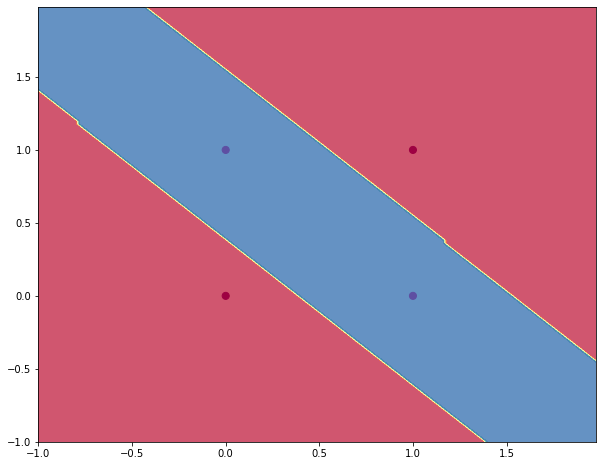

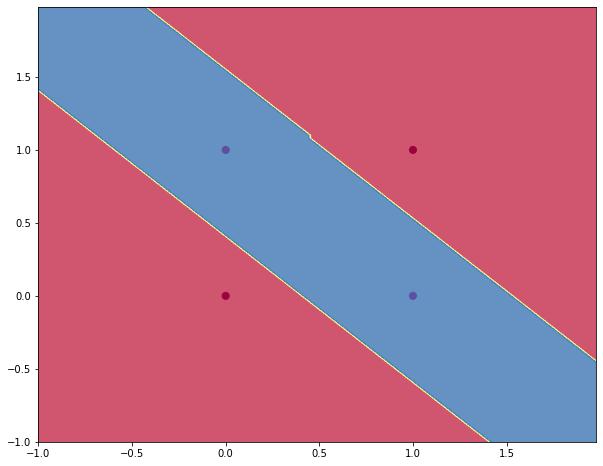

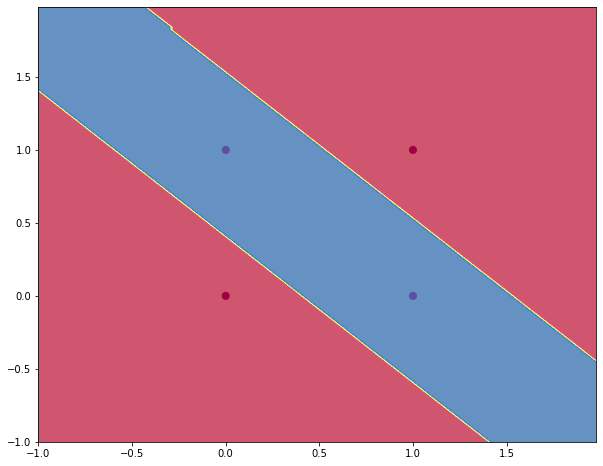

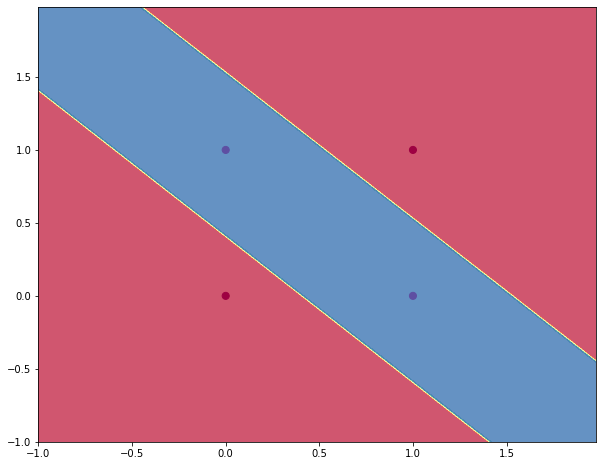

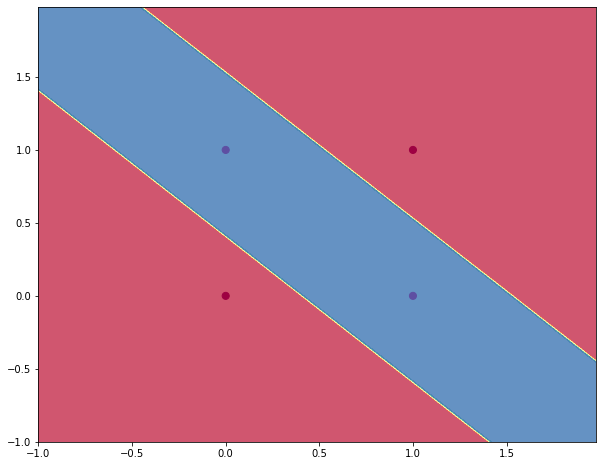

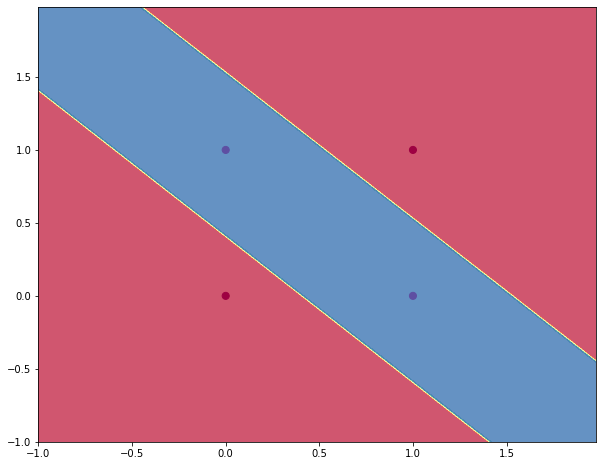

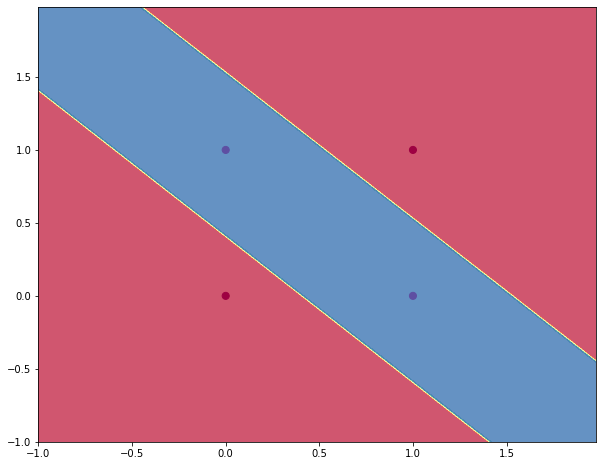

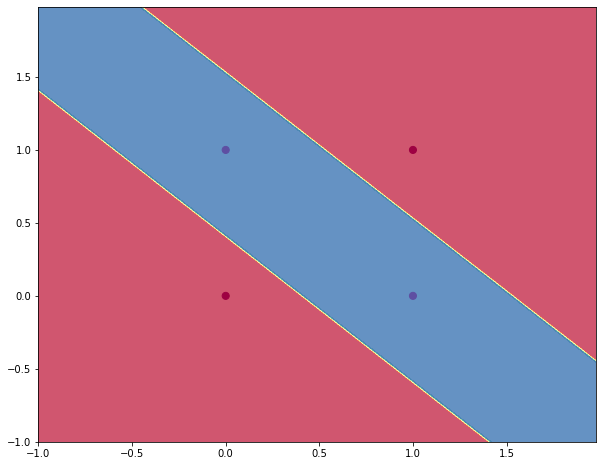

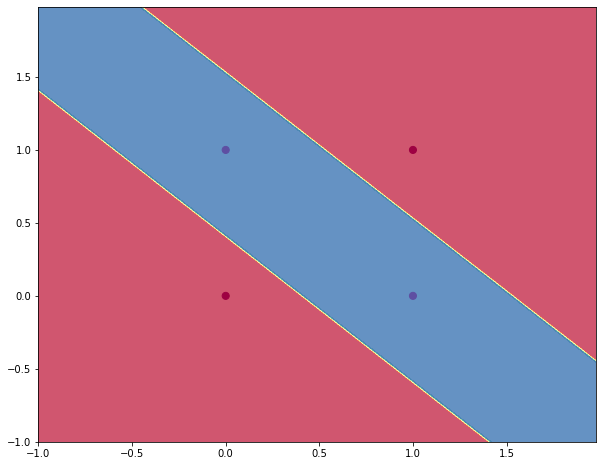

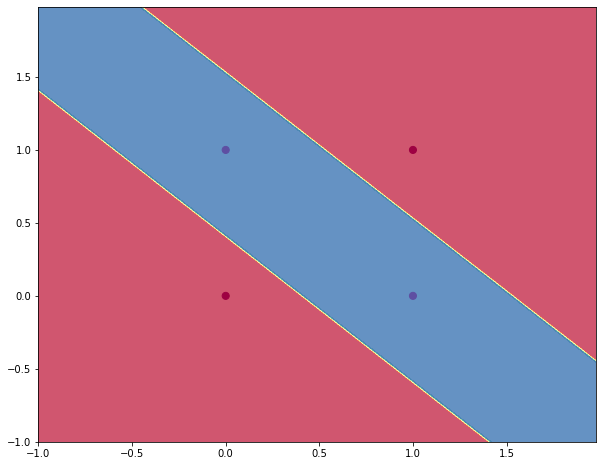

In [172]:
stats = train(X,y,params,20000)

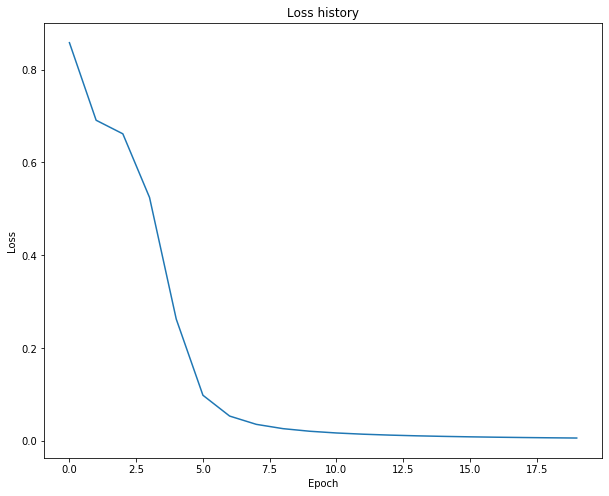

In [179]:
plt.plot(stats['loss_history'], label='train')
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig("loss.jpeg")
plt.show()

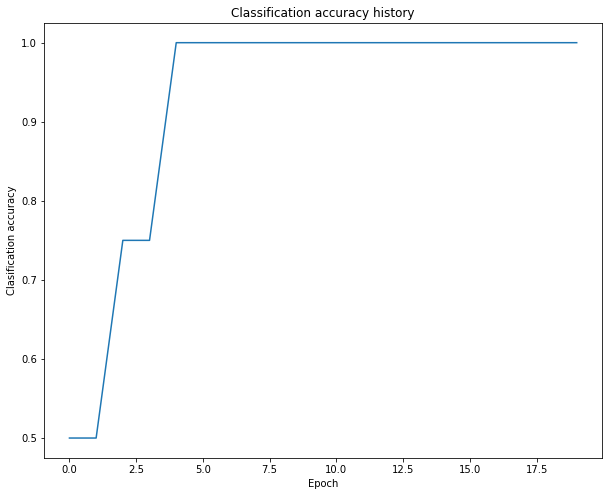

In [178]:
plt.plot(stats['acc_history'], label='train')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.savefig("acc.jpeg")
plt.show()

In [182]:
for i in range(0,20000,1000):
    print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


In [185]:
import imageio
outfilename = "my.gif" # 转化的GIF图片名称
filenames = []
for i in range(0,20000,1000):
    filename = str(i)+'.jpeg'
    filenames.append(filename)
frames = []
for image_name in filenames:
    im = imageio.imread(image_name)           # 读取方式上存在略微区别，由于是直接读取数据，并不需要后续处理
    frames.append(im)
imageio.mimsave(outfilename, frames, 'GIF', duration=0.2) # 生成方式也差不多